<a href="https://colab.research.google.com/github/wurifah/Bisaai/blob/main/wurifahwordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('areview.csv')
df.head(10)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


In [3]:
df.describe()

,tweet_id
count,4.000000e+04
mean,1.845184e+09
std,1.188579e+08
min,1.693956e+09
25%,1.751431e+09
50%,1.855443e+09
75%,1.962781e+09
max,1.966441e+09


In [4]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
import re,string,unicodedata
from string import punctuation

In [5]:
df['content']

0        @tiffanylue i know  i was listenin to bad habi...
1        Layin n bed with a headache  ughhhh...waitin o...
2                      Funeral ceremony...gloomy friday...
3                     wants to hang out with friends SOON!
4        @dannycastillo We want to trade with someone w...
                               ...                        
39995                                     @JohnLloydTaylor
39996                       Happy Mothers Day  All my love
39997    Happy Mother's Day to all the mommies out ther...
39998    @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...
39999    @mopedronin bullet train from tokyo    the gf ...
Name: content, Length: 40000, dtype: object

In [6]:
def hapus_kurung(text):
  return re.sub('\[[^]]*\]','',text)
def hapus_url(text):
  return re.sub(r'http\S+', '',text)
def remove_special_characters(text, remove_digits=True):
  pattern=r'[^a-zA-z0-9\s]'
  text=re.sub(pattern,'',text)
  return text

nltk.download('stopwords')
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

def remove_stopwords(text):
  final_text = []
  for i in text.split():
    if i.strip().lower() not in stop and i.strip().lower().isalpha():
      final_text.append(i.strip().lower())
  return " ".join(final_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
def clean_text(text):
  text = hapus_kurung(text)
  text = hapus_url(text)
  text = remove_special_characters(text, remove_digits=True)
  text = remove_stopwords(text)
  return text

df['content'] = df['content'].apply(clean_text)

In [8]:
df.tail(50)

,tweet_id,sentiment,content
39950,1753903814,happiness,debbiefletcher haha remember xx
39951,1753903876,love,follow dad georgiebouy wont much make feel loved
39952,1753903881,happiness,sharlynnx please come online hope youve amazin...
39953,1753903904,neutral,balkanbeat aha unfortunatelly norway big famil...
39954,1753903927,surprise,today interesting
39955,1753903951,neutral,got shower
39956,1753903987,worry,sleep jesse mccartney
39957,1753904028,enthusiasm,town mother nice amp sunnny
39958,1753904142,happiness,jameshancox lol maybe tooth fairy takes em kee...
39959,1753904145,relief,gooood party last night although extremely tir...


In [9]:
df.sentiment.replace("worry", 0 , inplace = True)
df.sentiment.replace("empty", 0 , inplace = True)
df.sentiment.replace("sadness", 0 , inplace = True)
df.sentiment.replace("hate", 0 , inplace = True)
df.sentiment.replace("neutral", 1 , inplace = True)
df.sentiment.replace("relief", 1 , inplace = True)
df.sentiment.replace("fun", 2 , inplace = True)
df.sentiment.replace("happiness", 2 , inplace = True)
df.sentiment.replace("love", 2 , inplace = True)
df.sentiment.replace("surprise", 2 , inplace = True)
df.sentiment.replace("enthusiasm", 2 , inplace = True)
df.tail(50)

,tweet_id,sentiment,content
39950,1753903814,2,debbiefletcher haha remember xx
39951,1753903876,2,follow dad georgiebouy wont much make feel loved
39952,1753903881,2,sharlynnx please come online hope youve amazin...
39953,1753903904,1,balkanbeat aha unfortunatelly norway big famil...
39954,1753903927,2,today interesting
39955,1753903951,1,got shower
39956,1753903987,0,sleep jesse mccartney
39957,1753904028,2,town mother nice amp sunnny
39958,1753904142,2,jameshancox lol maybe tooth fairy takes em kee...
39959,1753904145,1,gooood party last night although extremely tir...


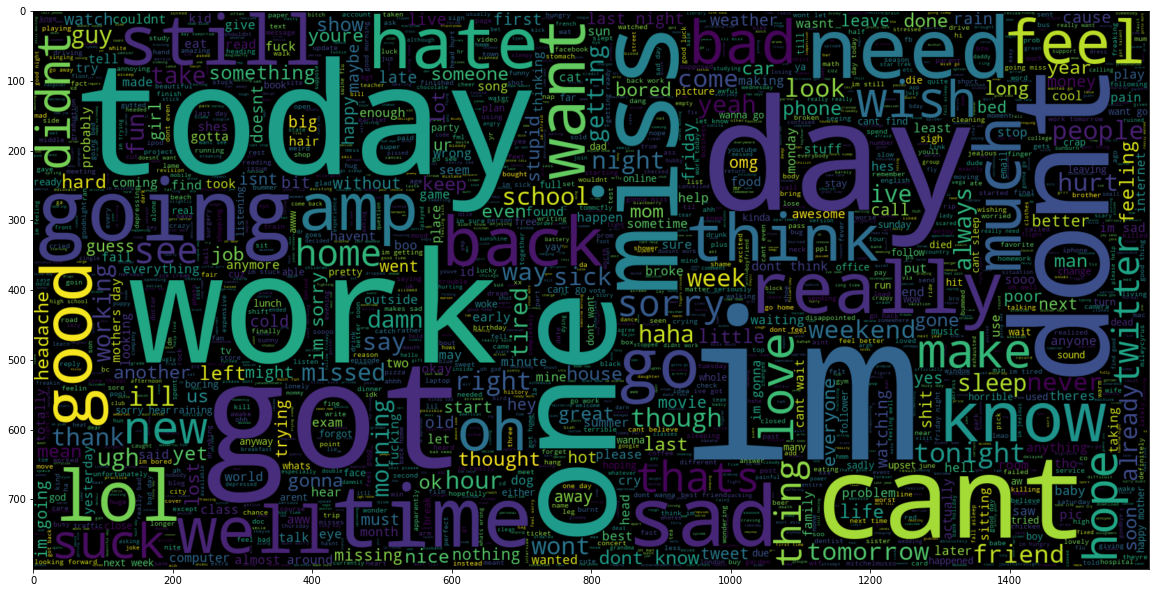

In [10]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width =1600, height = 800).generate(" ".join(df[df.sentiment == 0].content))
plt.imshow(wc , interpolation = 'bilinear')

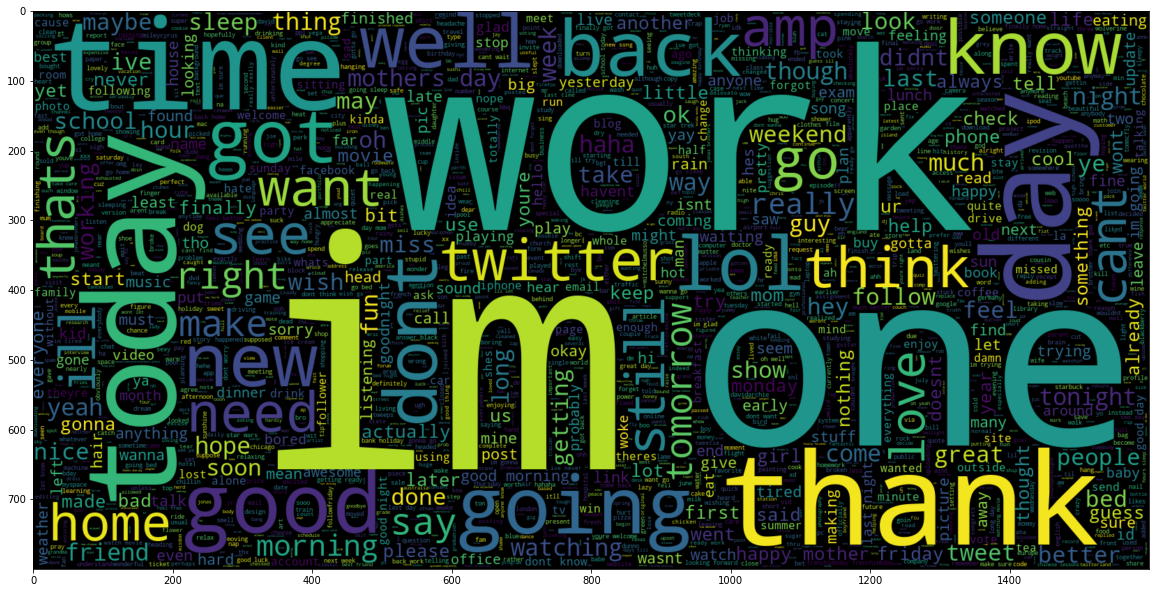

In [11]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width =1600, height = 800).generate(" ".join(df[df.sentiment == 1].content))
plt.imshow(wc , interpolation = 'bilinear')

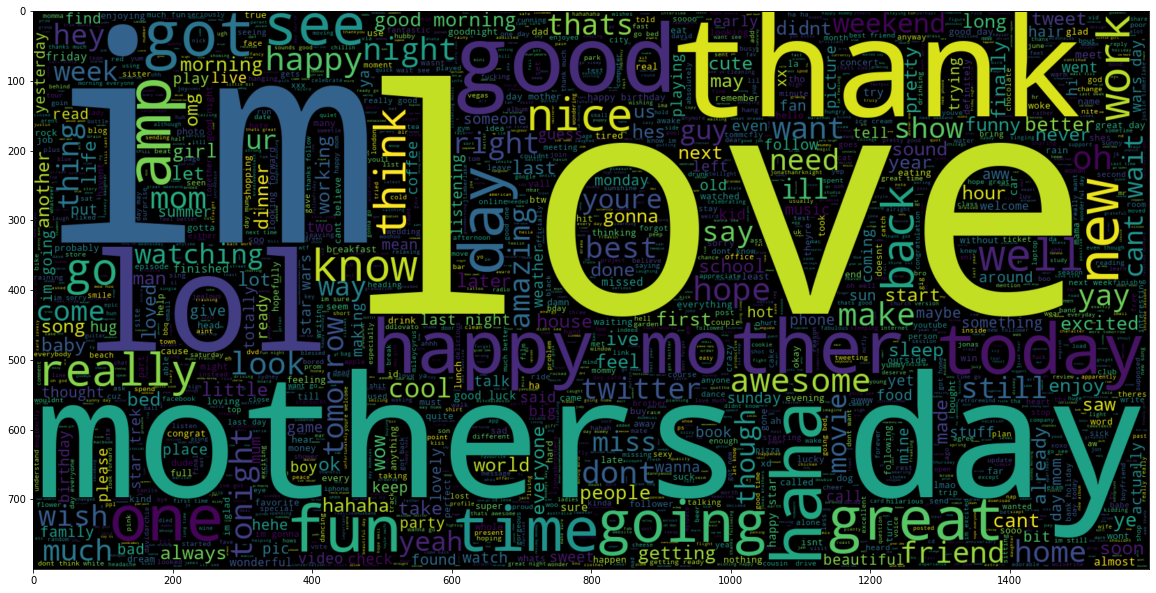

In [12]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width =1600, height = 800).generate(" ".join(df[df.sentiment == 2].content))
plt.imshow(wc , interpolation = 'bilinear')